# Partition the Data

In [28]:
# Import Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.weightstats import ztest as ztest
from sklearn.model_selection import train_test_split

In [10]:
# Import Data
churn = pd.read_csv("/Users/datascience/Desktop/ADS 502 Data Sets/Website Data Sets/churn.csv")
churn = churn[['State', 'Account Length','Area Code','Phone','Intl Plan', 'VMail Plan', 'VMail Message', 
               'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Charge' , 'Night Mins', 'Night Calls',
               'Night Charge', 'Intl Mins', 'Intl Calls' , 'Intl Charge', 'CustServ Calls', 'Old Churn', 
               'Churn']]

## 28. Partition the data set, so that 67% of the records are included in the training data set and 33% are included in the test data set. Use a bar graph to confirm your proportions.


Text(0.5, 1.0, ' Test_Train_Split Percentages')

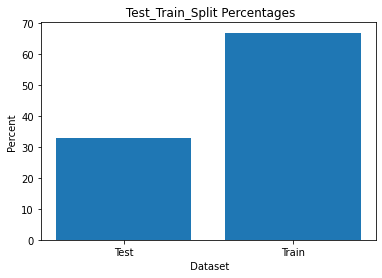

In [11]:
churn_train, churn_test = train_test_split(churn,test_size = 0.33, random_state = 1)
Total = churn.shape[0]
Test_count = churn_test.shape[0]/churn.shape[0]*100
Train_count = churn_train.shape[0]/churn.shape[0]*100

x = ['Test', 'Train']
plt.bar(x,[Test_count, Train_count])
plt.xlabel(" Dataset")
plt.ylabel("Percent")
plt.title(" Test_Train_Split Percentages")

## 29. Identify the total number of records in the training data set and how many records in the training data set have a churn value of true.

In [12]:
# Total Number of Records in Training Set
print (' The total number of records in training data set is', churn_train['Churn'].count())
# Number of True Values
churn_train['Churn'].value_counts()

 The total number of records in training data set is 2233


False    1907
True      326
Name: Churn, dtype: int64

## 30. Use your answers from the previous exercise to calculate how many true churn records you need to resample in order to have 20% of the rebalanced data set have true churn values.

 x = [0.2(2233)-326]/(0.8) = 150.5 = 151

## 31. Perform the rebalancing described in the previous exercise and confirm that 20% of the records in the rebalanced data set have true churn values.

In [13]:
to_resample = churn_train.loc[churn_train['Churn']]
our_resample = to_resample.sample(n=151, replace = True)
churn_train_bal = pd.concat([churn_train, our_resample])
ratio = churn_train_bal['Churn'].value_counts()[1]/ churn_train_bal.shape[0]*100
print ('The percentage of True Churn Values is', ratio.round(), '%')


The percentage of True Churn Values is 20.0 %


## 32. Which baseline model do we use to compare our classification model performance against? To which value does this baseline model assign all predictions? What is the accuracy of this baseline model?

We can use an 'All Positive Model' for our data which assigns all predictions as positive. Therefore the accuracy of this model is .20 or 20%. On the other hand, we can assign our model to be an 'All Negative Model' which assigns all predictionsas negative. In this case, the accuracy of the all negative model is .80 or 80%.

## 33. Validate your partition by testing for the difference in mean day minutes for the training set versus the test set.

In [48]:
#For numerical values, we use the two sample t-test for the difference in means


T = stats.ttest_ind(churn_train_bal['Day Mins'], churn_test['Day Mins'])
display(T)

Ttest_indResult(statistic=2.7418016939231094, pvalue=0.006141547429596528)

The p-value for our test is 0.00614 whis is greater than p-value(alpha) of 0.05. Therefore we rejust the null hypothesis and say that there is not enough evidence to support that the mean day minutes between both populations is different.

## 34. Validate your partition by testing for the difference in proportion of true churn records for the training set versus the test set.

For categorical variable with two classes, use the two -sample Z-test for the difference in proportions

In [47]:
# Convert False True to 0 1
zTrain = churn_train_bal['Churn'].astype(int)
zTest = churn_test['Churn'].astype(int)


#Test = churn_test['Churn'].astype(int)
display(ztest(zTrain, zTest, value = 0))


(4.0871408493062065, 4.367220033931794e-05)

The p-value for this test is 0.000046 with is lower than the p-value (alpha) of 0.05. Therefore we can accept the null hypothesis and say that tere is enough evidence to support the proportion of true churn records in the dataset.